# Analyse des données des systèmes éducatifs
## Objectif
#### Analyser les données des systèmes éducatifs pour comprendre les facteurs qui influencent la qualité de l'éducation.
## Méthode
#### 1. Importation des données
#### 2. Nettoyage des données
#### 3. Analyse exploratoire des données
#### 4. Modélisation des données
#### 5. Visualisation des données
#### 6. Interprétation des résultats
#

# 1. Importation des données et exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_data = pd.read_csv('data/EdStatsData.csv')
df_data.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_country = pd.read_csv('data/EdStatsCountry.csv')
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [4]:
df_country_series = pd.read_csv('data/EdStatsCountry-Series.csv')
df_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [5]:
df_footnote = pd.read_csv('data/EdStatsFootNote.csv')
df_footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [6]:
df_series = pd.read_csv('data/EdStatsSeries.csv')
df_series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Collecte des informations de chaque jeu de données
#### Maintenant que l'ensemble des données sont importé correctement et définis dans des dataframes, nous allons les
#### explorer pour comprendre les informations qu'elles contiennent.

#### pour que notre collecte d'informations soit plus facile, nous allons créer une fonction qui nous permettra de
#### récupérer les informations de chaque dataframe.

In [7]:
def analyse_dataframe(df, df_name):

    print(f"\n### Analyse rapide du fichier: {df_name} ###")

    # Résumé de la structure
    print(f"Structure: {df.shape[0]} lignes, {df.shape[1]} colonnes")
    
    # Identifier le type des lignes
    if 'Country Name' in df.columns and 'Indicator Name' in df.columns:
        print("Une ligne représente une combinaison de pays et d'indicateur.")
    elif 'Country Name' in df.columns:
        print("Une ligne représente un pays.")
    elif 'Indicator Name' in df.columns:
        print("Une ligne représente un indicateur.")
    elif 'Country Code' in df.columns and 'Description' in df.columns:
        print("Une ligne représente une description spécifique à un pays.")
    else:
        print("Autre chose.")

    # Doublons
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        print(f"-> {num_duplicates} doublons détectés. Suppression en cours.")
        df = df.drop_duplicates()
    else:
        print("-> Aucun doublon détecté.")

    # Valeurs manquantes
    missing_values = df.isnull().mean() * 100
    cols_to_drop = missing_values[missing_values > 20].index
    print(f"-> Colonnes supprimées (>20% valeurs manquantes): {list(cols_to_drop)}")
    df = df.drop(columns=cols_to_drop)

    # Statistiques descriptives
    numeric_cols = df.select_dtypes(include=[float, int]).columns
    if len(numeric_cols) > 0:
        print("\nStatistiques descriptives (colonnes numériques):")
        print(df[numeric_cols].describe())
    else:
        print("\nAucune colonne numérique détectée. Affichage des statistiques générales:")
        print(df.describe())

    # Aperçu des colonnes catégorielles
    print("\nAperçu des colonnes catégorielles:")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"- {col} (top 5 valeurs):")
        print(df[col].value_counts().head(5), "\n")

    print("\n### Analyse terminée ###")
    return df

In [8]:
df_country = analyse_dataframe(df_country, 'EdStatsCountry.csv')


### Analyse rapide du fichier: EdStatsCountry.csv ###
Structure: 241 lignes, 32 colonnes
Autre chose.
-> Aucun doublon détecté.
-> Colonnes supprimées (>20% valeurs manquantes): ['Special Notes', 'National accounts reference year', 'Lending category', 'Other groups', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data', 'Unnamed: 31']

Aucune colonne numérique détectée. Affichage des statistiques générales:
       Country Code Short Name Table Name Long Name 2-alpha code  \
count           241        241        241       241          238   
unique          241        241        241       241          238   
top             ABW      Ar

In [9]:
df_country_series = analyse_dataframe(df_country_series, 'EdStatsCountry-Series.csv')


### Analyse rapide du fichier: EdStatsCountry-Series.csv ###
Structure: 613 lignes, 4 colonnes
Autre chose.
-> Aucun doublon détecté.
-> Colonnes supprimées (>20% valeurs manquantes): ['Unnamed: 3']

Aucune colonne numérique détectée. Affichage des statistiques générales:
       CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            GEO  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154  

Aperçu des colonnes catégorielles:
- CountryCode (top 5 valeurs):
CountryCode
GEO    18
MDA    18
CYP    12
SRB    12
MUS    12
Name: count, dtype: int64 

- SeriesCode (top 5 valeurs):
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY

In [10]:
df_footnote = analyse_dataframe(df_footnote, 'EdStatsFootNote.csv')


### Analyse rapide du fichier: EdStatsFootNote.csv ###
Structure: 643638 lignes, 5 colonnes
Autre chose.
-> Aucun doublon détecté.
-> Colonnes supprimées (>20% valeurs manquantes): ['Unnamed: 4']

Aucune colonne numérique détectée. Affichage des statistiques générales:
       CountryCode   SeriesCode    Year   DESCRIPTION
count       643638       643638  643638        643638
unique         239         1558      56          9102
top            LIC  SH.DYN.MORT  YR2004  Country Data
freq          7320         9226   27128        191188

Aperçu des colonnes catégorielles:
- CountryCode (top 5 valeurs):
CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
Name: count, dtype: int64 

- SeriesCode (top 5 valeurs):
SeriesCode
SH.DYN.MORT    9226
SE.PRM.AGES    8771
SE.PRM.DURS    8771
SE.SEC.DURS    8619
SE.SEC.AGES    8581
Name: count, dtype: int64 

- Year (top 5 valeurs):
Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
Name: count, d

In [11]:
df_series = analyse_dataframe(df_series, 'EdStatsSeries.csv')


### Analyse rapide du fichier: EdStatsSeries.csv ###
Structure: 3665 lignes, 21 colonnes
Une ligne représente un indicateur.
-> Aucun doublon détecté.
-> Colonnes supprimées (>20% valeurs manquantes): ['Short definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']

Aucune colonne numérique détectée. Affichage des statistiques générales:
                        Series Code              Topic  \
count                          3665               3665   
unique                         3665                 37   
top     XGDP.56.FSGOV.FDINSTADM.FFD  Learning Outcomes   
freq                              1               1046   

                                           Indicator Name  \
count                    

#### Avant de continuer Visualisons les valeurs manquantes dans chaque dataframe. Cela nous permettra de voir
#### rapidement quelles colonnes contiennent des valeurs manquantes et de décider si nous devons les supprimer ou les
#### remplir.


In [12]:
def plot_missing_values_heatmap(df, df_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.isnull(), cmap='cool')
    plt.title(f'Heatmap des valeurs manquantes pour {df_name}')
    plt.show()

In [13]:
# df_data = df_data.dropna(thresh=df_data.shape[1]//2)
# missing_values = df_data.isnull().mean() * 100
# print("Proportion de valeurs manquantes par colonne (%):")
# print(missing_values)
# threshold = 20
# cols_to_drop = missing_values[missing_values > threshold].index
# df_data = df_data.drop(columns=cols_to_drop)
# print(f"Colonnes supprimées (plus de {threshold}% de valeurs manquantes): {list(cols_to_drop)}")

#### Après avoir analysé les données, nous pouvons voir que les dataframes contiennent des informations sur les pays, les indicateurs, les séries, les données et les notes de bas de page. Nous allons maintenant nettoyer les données pour les rendre plus faciles à analyser.

# 2. Nettoyage des données

# Nettoyage des données : Suppression des faux pays

## Objectif
### L'objectif est d'identifier et de supprimer les lignes correspondant à des "faux pays" dans le fichier `Country`. Ces faux pays représentent des entités qui ne sont pas des pays individuels, comme des zones géographiques agrégées (`Arab World`, `World`, etc.) ou des groupes économiques (`OECD members`, `Euro area`, etc.). Une fois les faux pays identifiés, nous utiliserons deux méthodes pour nettoyer les autres DataFrames :
1. #### Une liste de noms des faux pays pour filtrer les autres DataFrames.
2. #### Une jointure interne (`inner join`) entre le DataFrame `Country` nettoyé et les autres DataFrames.

---

## Étape 1 : Chargement et exploration des données
#### Dans cette étape, nous chargeons les données depuis le fichier `EdStatsCountry.csv` pour analyser leur structure et repérer les anomalies.


 


In [14]:
df_country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Upper middle income,AO,2002,Value added at producer prices (VAP),Country uses the 1993 System of National Accou...,Special trade system,1970
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,2011
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,Country uses the 1968 System of National Accou...,Special trade system,2011. Population figures compiled from adminis...


In [15]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Country Code                 241 non-null    object
 1   Short Name                   241 non-null    object
 2   Table Name                   241 non-null    object
 3   Long Name                    241 non-null    object
 4   2-alpha code                 238 non-null    object
 5   Currency Unit                215 non-null    object
 6   Region                       214 non-null    object
 7   Income Group                 214 non-null    object
 8   WB-2 code                    240 non-null    object
 9   National accounts base year  205 non-null    object
 10  SNA price valuation          197 non-null    object
 11  System of National Accounts  215 non-null    object
 12  System of trade              200 non-null    object
 13  Latest population census     213 no

In [16]:
df_country.value_counts()

Country Code  Short Name            Table Name            Long Name                     2-alpha code  Currency Unit       Region                      Income Group          WB-2 code  National accounts base year                         SNA price valuation                   System of National Accounts                                     System of trade       Latest population census
ABW           Aruba                 Aruba                 Aruba                         AW            Aruban florin       Latin America & Caribbean   High income: nonOECD  AW         2000                                                Value added at basic prices (VAB)     Country uses the 1993 System of National Accounts methodology.  Special trade system  2010                        1
AFG           Afghanistan           Afghanistan           Islamic State of Afghanistan  AF            Afghan afghani      South Asia                  Low income            AF         2002/03                                     

In [17]:
missing_percentage = df_country.isnull().mean() * 100
print(missing_percentage)

Country Code                    0.000000
Short Name                      0.000000
Table Name                      0.000000
Long Name                       0.000000
2-alpha code                    1.244813
Currency Unit                  10.788382
Region                         11.203320
Income Group                   11.203320
WB-2 code                       0.414938
National accounts base year    14.937759
SNA price valuation            18.257261
System of National Accounts    10.788382
System of trade                17.012448
Latest population census       11.618257
dtype: float64


#### on remarque que les colonnes ' Table Name ' et ' Short Name ' sont similaires, nous allons quand meme vérifier si elles contiennent les mêmes valeurs.

In [18]:
are_identical = (df_country['Short Name'] == df_country['Table Name']).all()
print(f"Les colonnes 'Short Name' et 'Table Name' sont-elles identiques ? {are_identical}")
if not are_identical:
    differences = df_country[df_country['Short Name'] != df_country['Table Name']]
    print("Différences entre les deux colonnes :")
    print(differences[['Short Name', 'Table Name']].head())

Les colonnes 'Short Name' et 'Table Name' sont-elles identiques ? False
Différences entre les deux colonnes :
                               Short Name           Table Name
21                            The Bahamas         Bahamas, The
29                                 Brunei    Brunei Darussalam
40                        Dem. Rep. Congo     Congo, Dem. Rep.
41                                  Congo          Congo, Rep.
57  East Asia & Pacific (developing only)  East Asia & Pacific


#### ci-dessus nous remarquons que les colonnes 'Short Name' et 'Table Name' ne sont pas tout à fait identique, mais vu les résultats, il s'avère que nous pouvons donc supprimer une des deux colonnes.

In [19]:
df_country.drop(columns=['Table Name'], inplace=True)
print ("La colonne 'Table Name' a été supprimée.")

La colonne 'Table Name' a été supprimée.


In [20]:
df_country.head()

,Country Code,Short Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,AFG,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
2,AGO,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Upper middle income,AO,2002,Value added at producer prices (VAP),Country uses the 1993 System of National Accou...,Special trade system,1970
3,ALB,Albania,Republic of Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,2011
4,AND,Andorra,Principality of Andorra,AD,Euro,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,Country uses the 1968 System of National Accou...,Special trade system,2011. Population figures compiled from adminis...


In [21]:
unique_short_name = df_country['Short Name'].unique()
print("Valeurs uniques dans 'Short Name' :")
print(unique_short_name)

Valeurs uniques dans 'Short Name' :
['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'The Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Channel Islands'
 'Chile' 'China' "Côte d'Ivoire" 'Cameroon' 'Dem. Rep. Congo' 'Congo'
 'Colombia' 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Curaçao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (developing only)'
 'East Asia & Pacific (all income levels)'
 'Europe & Central Asia (developing only)'
 'Europe & Central Asia (all income levels)' 'Ecuador' 'Egypt' 'Euro area'
 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Europe

### la liste généré ci-dessus contient des valeurs qui ne sont pas des pays individuels.

In [22]:
unique_region_name = df_country['Region'].unique()
print("Valeurs uniques dans 'Region' :")
print(unique_region_name)

Valeurs uniques dans 'Region' :
['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' nan 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


#### ci-dessus nous remarquons que nous avons des valeurs nan qui correspondent à des valeurs manquantes sur la localisation des pays dans le monde ce qui pourrait être un problème pour la suite de l'analyse.

In [23]:
unique_income_group = df_country['Income Group'].unique()
print("Valeurs uniques dans 'Income Group' :")
print(unique_income_group)

Valeurs uniques dans 'Income Group' :
['High income: nonOECD' 'Low income' 'Upper middle income' nan
 'Lower middle income' 'High income: OECD']


#### ci-dessus nous remarquons que nous avons des valeurs nan qui correspondent à des valeurs manquantes sur le groupe de revenu des pays ce qui pourrait être un problème pour la suite de l'analyse.

## Étape 2 : Identification des faux pays

### Objectif

#### L'objectif est d'identifier les faux pays dans le DataFrame `Country` en se basant sur les colonnes `Short Name`, `Region` et `Income Group`. Nous allons utiliser les critères suivants pour identifier les faux pays :



In [24]:
faux_pays_potentiels = [
    name for name in unique_short_name if "World" in name or name in ["Euro area", "OECD members"]
]
print("Faux pays potentiels :{}".format(faux_pays_potentiels))

Faux pays potentiels :['Arab World', 'Euro area', 'OECD members', 'World']


In [25]:
df_country.head()

,Country Code,Short Name,Long Name,2-alpha code,Currency Unit,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,System of National Accounts,System of trade,Latest population census
0,ABW,Aruba,Aruba,AW,Aruban florin,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,Special trade system,2010
1,AFG,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,1979
2,AGO,Angola,People's Republic of Angola,AO,Angolan kwanza,Sub-Saharan Africa,Upper middle income,AO,2002,Value added at producer prices (VAP),Country uses the 1993 System of National Accou...,Special trade system,1970
3,ALB,Albania,Republic of Albania,AL,Albanian lek,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,Value added at basic prices (VAB),Country uses the 1993 System of National Accou...,General trade system,2011
4,AND,Andorra,Principality of Andorra,AD,Euro,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,Country uses the 1968 System of National Accou...,Special trade system,2011. Population figures compiled from adminis...


### Étape 3 : Nettoyage des données

#### Objectif

#### L'objectif est de nettoyer le DataFrame `Country` en supprimant les faux pays identifiés à l'étape précédente. Nous allons également supprimer les lignes contenant des valeurs manquantes dans les colonnes `Region` et `Income Group`.  

In [26]:
df_country = df_country[~df_country['Short Name'].isin(faux_pays_potentiels)]
df_country = df_country.dropna(subset=['Region', 'Income Group'])

In [27]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 240
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Country Code                 214 non-null    object
 1   Short Name                   214 non-null    object
 2   Long Name                    214 non-null    object
 3   2-alpha code                 211 non-null    object
 4   Currency Unit                214 non-null    object
 5   Region                       214 non-null    object
 6   Income Group                 214 non-null    object
 7   WB-2 code                    213 non-null    object
 8   National accounts base year  205 non-null    object
 9   SNA price valuation          197 non-null    object
 10  System of National Accounts  214 non-null    object
 11  System of trade              200 non-null    object
 12  Latest population census     212 non-null    object
dtypes: object(13)
memory usage: 23.4+ KB


# Maintenant que nous avons la liste des faux pays, nous allons pouvoir cleaner le dataframe df_Data en supprimant les lignes correspondantes.
 


In [28]:
# Suppression des faux pays dans le dataframe df_data
df_data = df_data[~df_data['Country Name'].isin(faux_pays_potentiels)]


In [29]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872270 entries, 3665 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    872270 non-null  object 
 1   Country Code    872270 non-null  object 
 2   Indicator Name  872270 non-null  object 
 3   Indicator Code  872270 non-null  object 
 4   1970            71604 non-null   float64
 5   1971            34837 non-null   float64
 6   1972            34900 non-null   float64
 7   1973            34823 non-null   float64
 8   1974            34992 non-null   float64
 9   1975            86556 non-null   float64
 10  1976            36724 non-null   float64
 11  1977            36811 non-null   float64
 12  1978            36812 non-null   float64
 13  1979            36045 non-null   float64
 14  1980            88349 non-null   float64
 15  1981            37998 non-null   float64
 16  1982            36734 non-null   float64
 17  1983        

In [30]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
3665,East Asia & Pacific,EAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3666,East Asia & Pacific,EAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3667,East Asia & Pacific,EAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3668,East Asia & Pacific,EAS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3669,East Asia & Pacific,EAS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_data['Country Name'].unique()

array(['East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'Afghanistan', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium

#### On remarque que dans la liste des pays présent dans le dataframe df_data, il y a des valeurs qui ne sont pas des pays individuels. Nous allons donc les supprimer pour ne garder que les pays individuels.

In [32]:
# Liste des noms de pays à exclure
vague_country_names = [
    'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Europe & Central Asia',
    'Europe & Central Asia (excluding high income)', 'European Union', 'Heavily indebted poor countries (HIPC)',
    'High income', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income',
    'Middle East & North Africa', 'Middle East & North Africa (excluding high income)', 'Middle income',
    'North America', 'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
    'Upper middle income'
]

# Filtrer le DataFrame pour exclure les noms de pays vagues
df_data_filtered = df_data[~df_data['Country Name'].isin(vague_country_names)]

# Afficher les noms de pays uniques après le filtrage
print(df_data_filtered['Country Name'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt, Arab Rep.' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia'
 'Gabon' 'Gambia, The' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'G

In [33]:
df_data_filtered['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      shape=(3665,), dtype=object)

In [34]:
df_data_filtered.isna()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
91625,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
91626,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
91627,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
91628,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
91629,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
886926,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
886927,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
886928,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


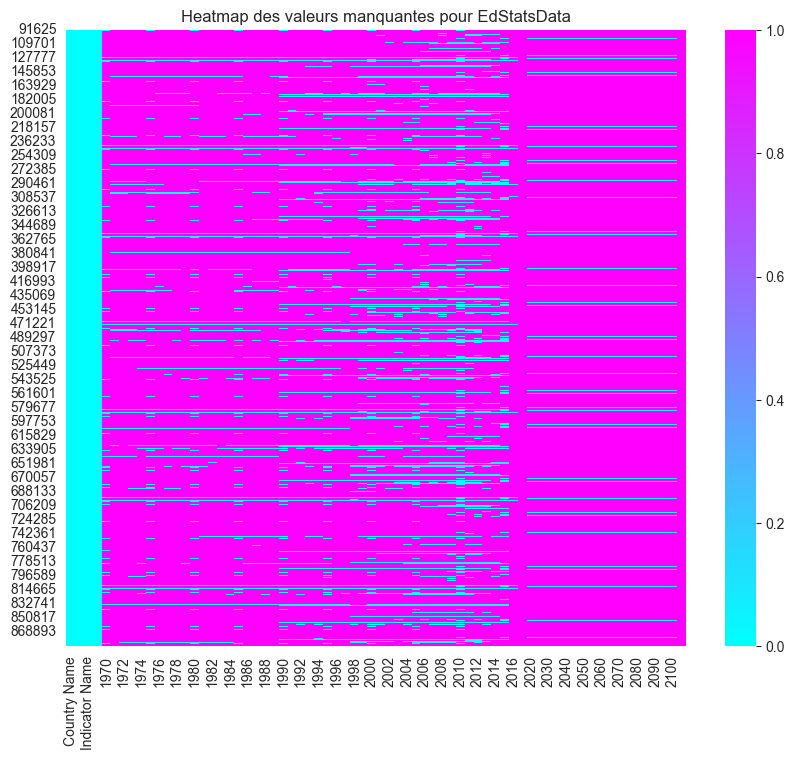

In [35]:
plot_missing_values_heatmap(df_data_filtered, 'EdStatsData')

## Nous allons de voir justifier l'année à choisir entre 1970 et 2016 pour l'analyse des données.





In [36]:
# Sélection des colonnes d'années
year_columns = [str(year) for year in range(1970, 2017)]
# Compter les valeurs non nulles pour chaque année
year_counts = df_data_filtered[year_columns].count()
# Afficher les résultats
best_year = year_counts.idxmax()
print(f"La meilleur année pour notre analyse est: {best_year}")

La meilleur année pour notre analyse est: 2010


In [37]:
# Filtrer le dataframe pour l'année déterminée
df_data_2010 = df_data_filtered[['Country Name', 'Indicator Name', best_year]]

# Identifier les indicateurs qui n'ont pas de valeurs manquantes pour cette année
df_data_2010 = df_data_2010.dropna(subset=[best_year])

# Afficher les premières lignes pour vérifier
print(df_data_2010.head(50))

      Country Name                                     Indicator Name  \
91753  Afghanistan  All staff compensation as % of total expenditu...   
91754  Afghanistan  All staff compensation as % of total expenditu...   
91755  Afghanistan  All staff compensation as % of total expenditu...   
91756  Afghanistan  All staff compensation as % of total expenditu...   
91774  Afghanistan  Barro-Lee: Average years of primary schooling,...   
91775  Afghanistan  Barro-Lee: Average years of primary schooling,...   
91776  Afghanistan  Barro-Lee: Average years of primary schooling,...   
91777  Afghanistan  Barro-Lee: Average years of primary schooling,...   
91778  Afghanistan  Barro-Lee: Average years of primary schooling,...   
91779  Afghanistan  Barro-Lee: Average years of primary schooling,...   
91780  Afghanistan  Barro-Lee: Average years of primary schooling,...   
91781  Afghanistan  Barro-Lee: Average years of primary schooling,...   
91782  Afghanistan  Barro-Lee: Average years of pri

In [38]:
df_data_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233590 entries, 91753 to 886921
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    233590 non-null  object 
 1   Indicator Name  233590 non-null  object 
 2   2010            233590 non-null  float64
dtypes: float64(1), object(2)
memory usage: 7.1+ MB


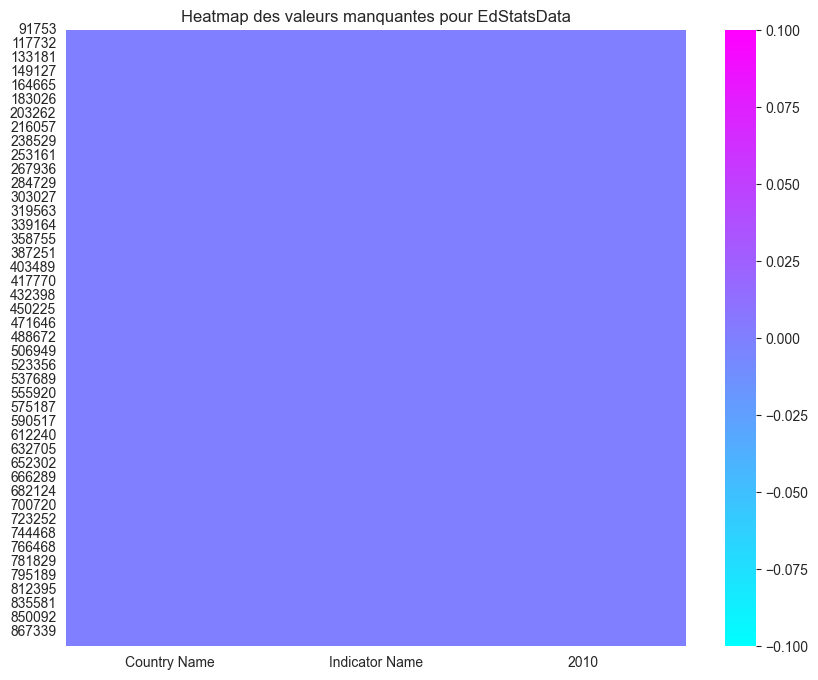

In [39]:
plot_missing_values_heatmap(df_data_2010, 'EdStatsData')

In [40]:
df_data_2010['Indicator Name'].unique()

array(['All staff compensation as % of total expenditure in primary public institutions (%)',
       'All staff compensation as % of total expenditure in public institutions (%)',
       'All staff compensation as % of total expenditure in secondary public institutions (%)',
       ...,
       'SABER: (Early Childhood Development) Policy Goal 3 Lever 2: Quality Standards',
       'SABER: (Early Childhood Development) Policy Goal 3 Lever 3: Compliance with Standards',
       'SABER: (Early Childhood Development) Policy Goal 3: Monitoring and Assuring Quality'],
      shape=(2568,), dtype=object)

## Faisons un choix des indicateurs pertinents pour notre analyse.


### Pour determiner quelles sont les indicateurs les plus pertinents pour notre analyse, nous allons afficher les indicateurs les plus fréquents dans le dataframe df_data_2010.    


In [41]:
# Compter les valeurs uniques pour chaque indicateur
indicator_counts = df_data_2010['Indicator Name'].value_counts()
print ("Les indicateurs les plus fréquents sont :{}".format(indicator_counts.head(50)))

Les indicateurs les plus fréquents sont :Indicator Name
Population growth (annual %)                                                                                   215
Population, total                                                                                              215
Theoretical duration of primary education (years)                                                              208
Official entrance age to primary education (years)                                                             208
Theoretical duration of lower secondary education (years)                                                      205
Theoretical duration of pre-primary education (years)                                                          205
Theoretical duration of secondary education (years)                                                            205
Theoretical duration of upper secondary education (years)                                                      205
Official entrance age to

### La sélection de 10 indicateurs pour l'analyse

Pour déterminer les meilleurs pays dans lesquels notre entreprise doit s'implanter, nous avons sélectionné 10 indicateurs clés à partir du jeu de données. Ces indicateurs ont été choisis en fonction de leur pertinence pour la performance économique, les données démographiques et l'avancement technologique, qui sont des facteurs critiques pour l'expansion des affaires. Voici la justification pour chaque indicateur sélectionné :

1. **Croissance de la population (en \% annuel)**
   - Cet indicateur fournit des informations sur le taux de croissance de la population, ce qui peut affecter la taille du marché et la disponibilité de la main-d'œuvre.

2. **PIB aux prix du marché (en dollars US courants)**
   - Le Produit Intérieur Brut (PIB) aux prix du marché est une mesure principale de la performance économique et du potentiel de marché d'un pays.

3. **PIB par habitant (en dollars US courants)**
   - Le PIB par habitant indique la production économique moyenne par personne, reflétant le niveau de vie et le pouvoir d'achat de la population.

4. **Utilisateurs d'Internet (pour 100 personnes)**
   - Le nombre d'utilisateurs d'Internet est un indicateur clé de l'adoption technologique et du potentiel du marché numérique, crucial pour les entreprises modernes.

5. **Nombre total d'étudiants en mobilité internationale dans l'enseignement supérieur, tous pays, les deux sexes (nombre)**
   - Cet indicateur montre le nombre d'étudiants étudiant à l'étranger, reflétant l'investissement du pays dans l'éducation et le potentiel d'une main-d'œuvre qualifiée.

6. **Population en âge officiel pour l'enseignement secondaire supérieur, les deux sexes (nombre)**
   - La taille de la population dans le groupe d'âge de l'enseignement secondaire supérieur indique le potentiel futur de la main-d'œuvre et l'infrastructure éducative.

7. **Population âgée de 15 à 64 ans (en \% du total)**
   - Le pourcentage de la population en âge de travailler est crucial pour comprendre le marché du travail et la productivité économique.

8. **RNB (en dollars US courants)**
   - Le Revenu National Brut (RNB) mesure le revenu total gagné par les résidents d'un pays, offrant une vue plus large de la santé économique que le PIB seul.

9. **Taux de mortalité des moins de 5 ans (pour 1 000)**
   - Le taux de mortalité des moins de 5 ans est un indicateur important de la santé, reflétant l'environnement sanitaire global et la qualité de vie dans un pays.

10. **PIB, PPA (en dollars internationaux courants)**
    - Le PIB en Parité de Pouvoir d'Achat (PPA) ajuste les différences de niveau de prix entre les pays, offrant une comparaison plus précise de la productivité économique et des niveaux de vie.

Ces indicateurs fournissent collectivement une vue d'ensemble complète du paysage économique, démographique et technologique des pays potentiels pour l'expansion de notre entreprise. En analysant ces indicateurs, nous pouvons prendre des décisions éclairées sur les marchés les plus prometteurs pour la croissance de notre entreprise.

In [42]:
# en afficher une matrice de correlation des indicateurs pour determiner ceux qui sont les plus corrélés

In [43]:
# Sélection des indicateurs clés
selected_indicators = [
    'Population growth (annual %)',
    'GDP at market prices (current US$)',
    'GDP per capita (current US$)',
    'Internet users (per 100 people)',
    'Population of the official age for upper secondary education, both sexes (number)',    
    'Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)',    
    'Population ages 15-64 (% of total)',     
    'Mortality rate, under-5 (per 1,000)',
    'GNI (current US$)',
    'GDP, PPP (current international $)',
]


In [44]:
# Filtrer les indicateurs sélectionnés
df_data_selected = df_data_2010[df_data_2010['Indicator Name'].isin(selected_indicators)]

In [45]:
df_data_selected.head()

,Country Name,Indicator Name,2010
92868,Afghanistan,GDP at market prices (current US$),1.593680e+10
92870,Afghanistan,GDP per capita (current US$),5.533003e+02
92874,Afghanistan,"GDP, PPP (current international $)",4.555511e+10
92875,Afghanistan,GNI (current US$),1.599880e+10
93000,Afghanistan,Internet users (per 100 people),4.000000e+00


In [46]:
df_data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1790 entries, 92868 to 886363
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1790 non-null   object 
 1   Indicator Name  1790 non-null   object 
 2   2010            1790 non-null   float64
dtypes: float64(1), object(2)
memory usage: 55.9+ KB


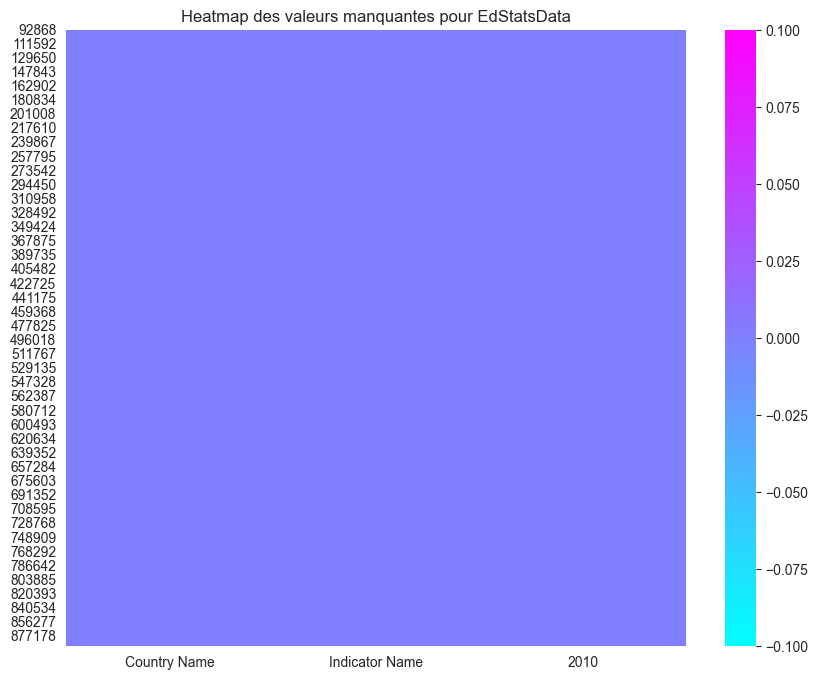

In [47]:
plot_missing_values_heatmap(df_data_selected, 'EdStatsData')

In [48]:
df_data_selected['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Fij

In [49]:
df_data_selected['Country Name'].value_counts()

Country Name
Afghanistan                  9
Albania                      9
Algeria                      9
Antigua and Barbuda          9
Angola                       9
                            ..
Curacao                      1
Channel Islands              1
British Virgin Islands       1
St. Martin (French part)     1
Sint Maarten (Dutch part)    1
Name: count, Length: 217, dtype: int64

In [50]:
df_data_selected['Indicator Name'].value_counts()

Indicator Name
Population growth (annual %)                                                                                   215
GDP at market prices (current US$)                                                                             203
GDP per capita (current US$)                                                                                   203
Internet users (per 100 people)                                                                                202
Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)    197
Population of the official age for upper secondary education, both sexes (number)                              195
GNI (current US$)                                                                                              193
Mortality rate, under-5 (per 1,000)                                                                            192
GDP, PPP (current international $)                               

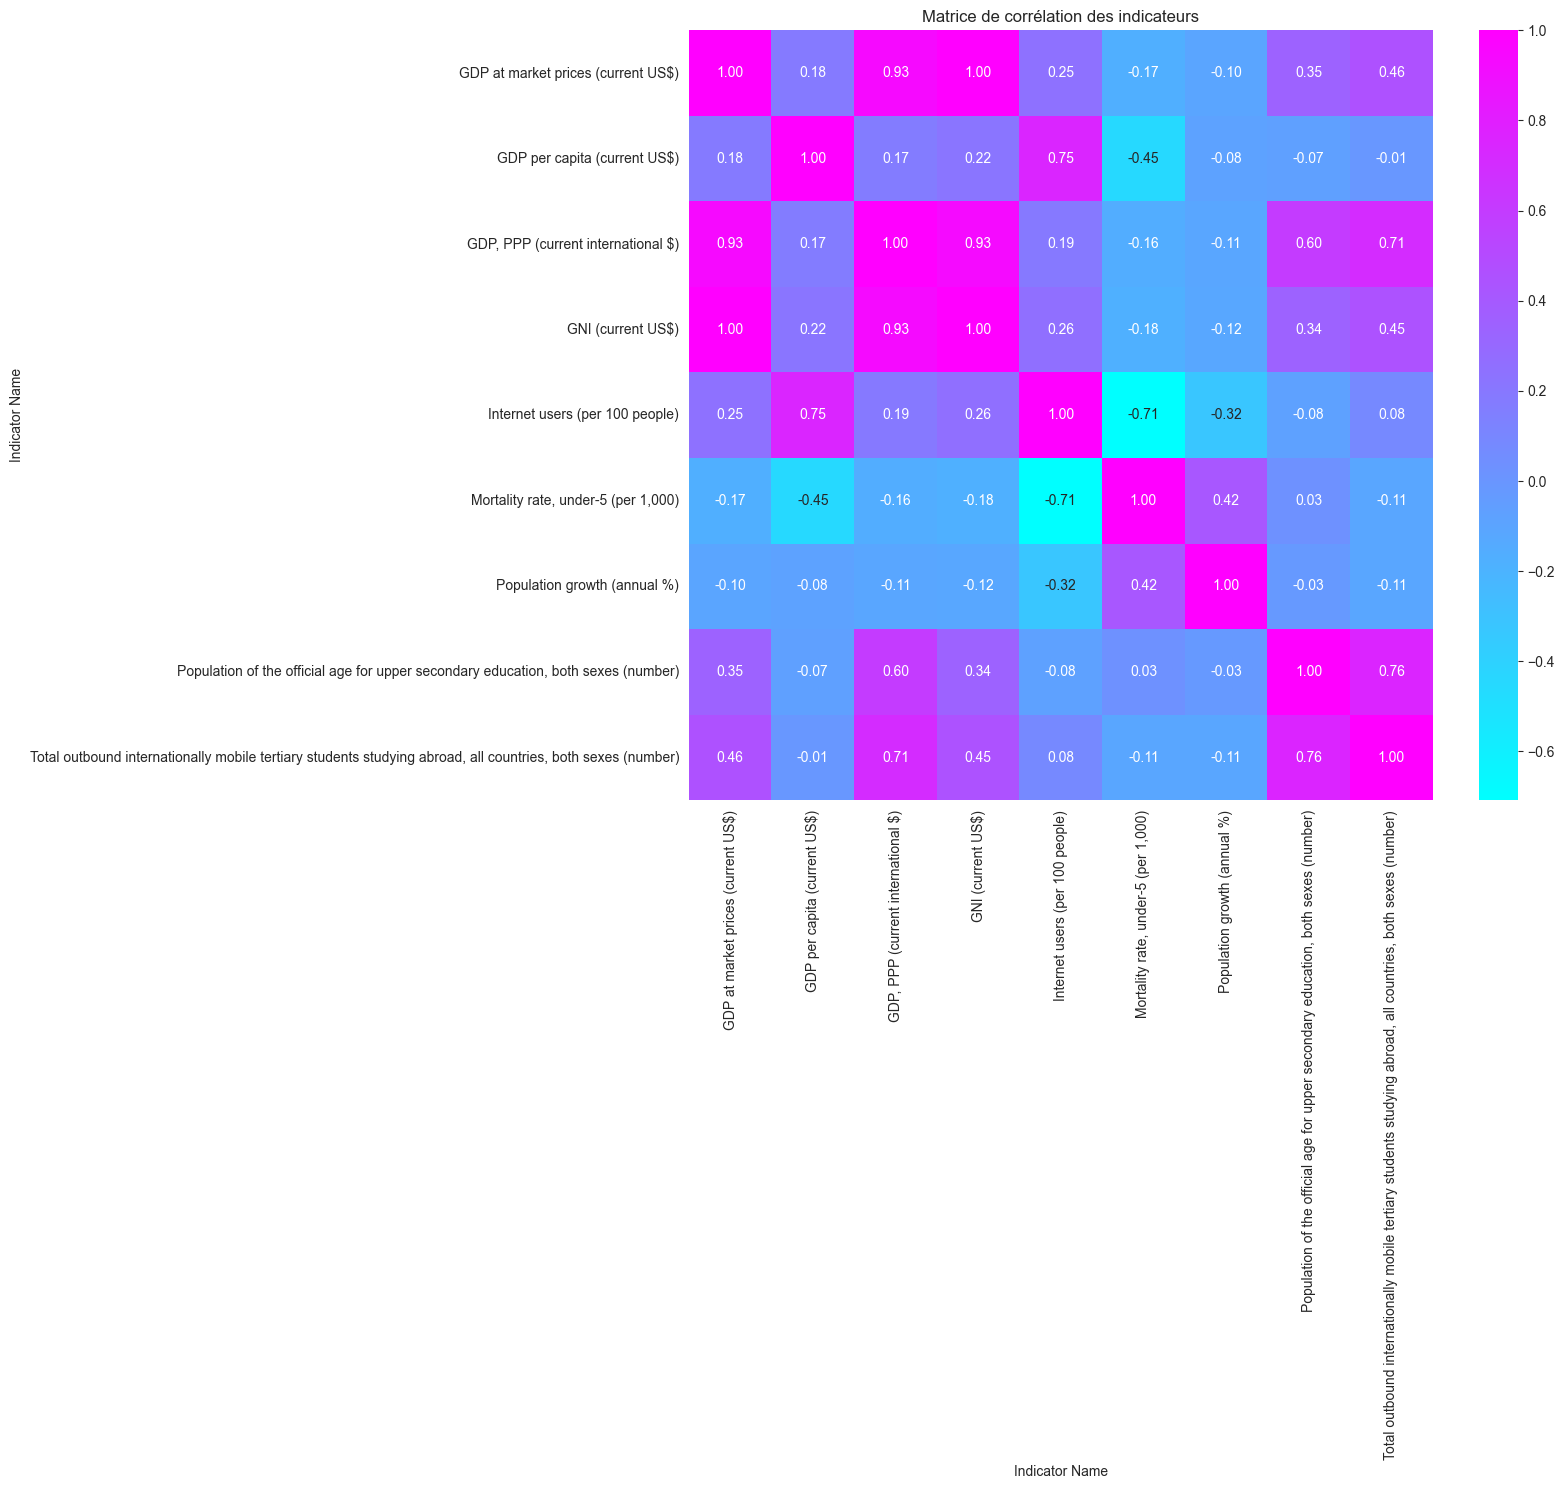

In [51]:
# Convertir les données en format numérique si nécessaire
df_data_selected_numeric = df_data_selected.pivot(index='Country Name', columns='Indicator Name', values='2010').apply(pd.to_numeric, errors='coerce')

# Calculer la matrice de corrélation
correlation_matrix = df_data_selected_numeric.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt='.2f')
plt.title('Matrice de corrélation des indicateurs')
plt.show()

### Voici Comment interpréter la matrice de corrélation des indicateurs :
1. **Corrélation positive forte (0.7 à 1.0) :** Les indicateurs avec une corrélation positive forte sont étroitement liés et évoluent dans la même direction. Cela signifie que si l'un des indicateurs augmente, l'autre augmente également, et vice versa.    
2. **Corrélation positive modérée (0.3 à 0.7) :** Les indicateurs avec une corrélation positive modérée sont liés mais pas de manière aussi forte que les indicateurs fortement corrélés. Ils peuvent évoluer dans la même direction, mais avec moins de cohérence.
3. **Corrélation négative modérée (-0.3 à -0.7) :** Les indicateurs avec une corrélation négative modérée sont liés mais évoluent dans des directions opposées. Cela signifie que si l'un des indicateurs augmente, l'autre diminue, et vice versa.
4. **Corrélation négative forte (-0.7 à -1.0) :** Les indicateurs avec une corrélation négative forte sont étroitement liés mais évoluent dans des directions opposées de manière très cohérente. Cela signifie que si l'un des indicateurs augmente, l'autre diminue de manière prévisible, et vice versa.
5. **Corrélation nulle (0.0) :** Les indicateurs avec une corrélation nulle ne sont pas liés et évoluent de manière indépendante. Cela signifie que les variations dans un indicateur n'ont pas d'impact sur les variations dans l'autre indicateur.
6. **Corrélation et causalité :** Il est important de noter que la corrélation ne signifie pas nécessairement une relation de cause à effet entre les indicateurs. D'autres facteurs peuvent influencer les variations observées, et une analyse plus approfondie est nécessaire pour établir des relations de causalité.
7. **Interprétation des résultats :** En analysant la matrice de corrélation, nous pouvons identifier les relations entre les indicateurs et déterminer les tendances et les associations significatives. Cela nous permet de mieux comprendre les facteurs qui influencent les systèmes éducatifs et d'identifier les indicateurs clés pour notre analyse.
8. **Utilisation des résultats :** Les résultats de la matrice de corrélation peuvent être utilisés pour sélectionner les indicateurs les plus pertinents pour notre analyse, identifier les tendances et les relations significatives, et évaluer l'impact des facteurs économiques, démographiques et technologiques sur les systèmes éducatifs. Cela nous permet de prendre des décisions éclairées pour l'expansion de notre entreprise et l'amélioration de la qualité de l'éducation.
9. **Limites de la corrélation :** Il est important de noter que la corrélation ne mesure que les relations linéaires entre les indicateurs et ne capture pas les relations non linéaires ou complexes. Une analyse plus approfondie est nécessaire pour évaluer les interactions entre les indicateurs et les facteurs sous-jacents qui influencent les systèmes éducatifs.
10. **Analyse supplémentaire :** Pour une analyse plus approfondie, nous pouvons utiliser des techniques statistiques avancées pour modéliser les relations entre les indicateurs, identifier les facteurs prédictifs et évaluer les scénarios potentiels pour l'expansion de notre entreprise. Cela nous permet de tirer des insights significatifs et de prendre des décisions stratégiques basées sur des données fiables et des analyses approfondies.


In [52]:
from sklearn.preprocessing import MinMaxScaler
# Normaliser les données
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_data_selected_numeric), index=df_data_selected_numeric.index, columns=df_data_selected_numeric.columns)

# Calculer le score composite pour chaque pays (somme des valeurs normalisées)
df_normalized['Score'] = df_normalized.sum(axis=1)

# Classer les pays en fonction de leurs scores
df_ranked = df_normalized.sort_values(by='Score', ascending=False)

# Afficher les 10 pays avec les scores les plus élevés
top_10_countries = df_ranked.head(10)
print(top_10_countries)

Indicator Name  GDP at market prices (current US$)  \
Country Name                                         
United States                             1.000000   
China                                     0.407675   
India                                     0.110702   
Japan                                     0.380910   
Qatar                                     0.008359   
Germany                                   0.228347   
Monaco                                    0.000355   
Liechtenstein                             0.000338   
Luxembourg                                0.003554   
Norway                                    0.028675   

Indicator Name  GDP per capita (current US$)  \
Country Name                                   
United States                       0.334289   
China                               0.030062   
India                               0.007739   
Japan                               0.307443   
Qatar                               0.486581   
Germany        

In [ ]:
# nous pouvons maintenant visualiser les résultats obtenus

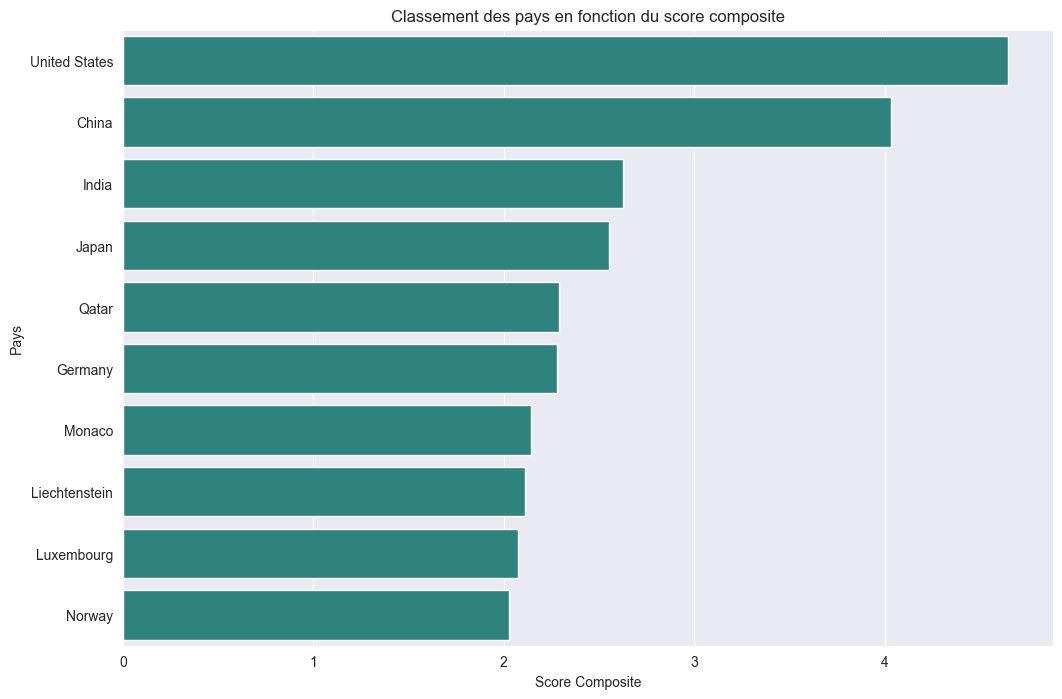

In [55]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries['Score'], y=top_10_countries.index, palette='viridis', hue=any  ,legend=False)
plt.xlabel('Score Composite')
plt.ylabel('Pays')
plt.title('Classement des pays en fonction du score composite')
plt.show()